---
title: Final Project Blog
author: Carolyn_Mack and Luna Oley
date: 2025-05-13
categories: [project] # tags for a blog post (e.g., python)
image: "https://as1.ftcdn.net/v2/jpg/01/70/53/70/1000_F_170537083_gA1RBTufrZRvHPmlHfZtUeUnjeb4gcUD.jpg"

toc: true
---

In [ ]:
# Below is to import the pandas library as pd
import pandas as pd

# Below is for an interactive display of DataFrame in Colab
from google.colab import data_table
data_table.enable_dataframe_formatter()

# DANL 210 Final Project:
### By Luna Oley and Carolyn Mack

## Unifying Environmental, Social, and Governance (ESG) Metrics with Financial Analysis


### Introduction:

Background:

Environmental, Social and Governance metrics are vital for looking at corpoations sustaintability and ethical impact. These ESG metrics can be very useful for investiors and stakeholders to look at the long term risk and value of companies. Often times companies with better ESG metrics are ranked higher and have more potential for long term growth since they are more conciously aware of environmental and social issues.


Statement of the Problem:

   In this project we will evaluate these ESG metrics pertaining to total ESG risk score, Environmental Risk Score, Social Risk score, Governance Risk Score and Controvery Level. These specific metrics are not commonly analyzed when looking at how a company is performing in the stock market. Thus this projecct aims to make a connections between the relationship of ESG metrics and stock market outcomes to see any trends or correlations between a company's total value and their risk profile.

In [ ]:
url = "https://bcdanl.github.io/data/stock_history_2023.csv"
stock_history_2023 = pd.read_csv(url)
stock_history_2023

,Date,Year,Symbol,Open,High,Low,Close,Volume,Dividend,Stock_Splits
0,2023-12-29,2023,A,138.587233,139.215036,137.879691,138.547363,1014400,0.236,0.0
1,2023-12-28,2023,A,139.815657,140.084270,138.930245,139.049637,892600,0.000,0.0
2,2023-12-27,2023,A,139.059578,139.437624,138.363189,139.099380,1182300,0.000,0.0
3,2023-12-26,2023,A,138.591994,139.746018,138.373126,139.089416,948400,0.000,0.0
4,2023-12-22,2023,A,138.890449,139.636584,138.074668,138.850662,1204100,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...
157745,2023-01-09,2023,ZTS,146.205080,146.715330,144.242596,144.301468,1700500,0.000,0.0
157746,2023-01-06,2023,ZTS,143.840283,145.832203,138.865393,144.870590,1761200,0.000,0.0
157747,2023-01-05,2023,ZTS,144.586064,145.400482,141.563836,142.721695,1560900,0.000,0.0
157748,2023-01-04,2023,ZTS,146.224720,147.981137,145.184606,146.165848,1796100,0.000,0.0


In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ESG_data = pd.read_csv("/content/ESG_data.csv")
ESG_data

FileNotFoundError: [Errno 2] No such file or directory: '/content/ESG_data.csv'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
growth = []
for i in range(1, len(stock_history_2023)):
    value = (stock_history_2023.loc[i, 'Close'] - stock_history_2023.loc[i-1, 'Close']) / stock_history_2023.loc[i-1, 'Close']
    growth.append(value)

# Insert into DataFrame
stock_history_2023['Growth'] = [None] + growth  # First row has no previous value

print(stock_history_2023)

              Date  Year Symbol        Open        High         Low  \
0       2023-12-29  2023      A  138.587233  139.215036  137.879691   
1       2023-12-28  2023      A  139.815657  140.084270  138.930245   
2       2023-12-27  2023      A  139.059578  139.437624  138.363189   
3       2023-12-26  2023      A  138.591994  139.746018  138.373126   
4       2023-12-22  2023      A  138.890449  139.636584  138.074668   
...            ...   ...    ...         ...         ...         ...   
157745  2023-01-09  2023    ZTS  146.205080  146.715330  144.242596   
157746  2023-01-06  2023    ZTS  143.840283  145.832203  138.865393   
157747  2023-01-05  2023    ZTS  144.586064  145.400482  141.563836   
157748  2023-01-04  2023    ZTS  146.224720  147.981137  145.184606   
157749  2023-01-03  2023    ZTS  145.871459  145.999010  142.486177   

             Close   Volume  Dividend  Stock_Splits    Growth  
0       138.547363  1014400     0.236           0.0       NaN  
1       139.049637 

In [ ]:
# Remove outliers using IQR method
Q1 = stock_history_2023['Growth'].quantile(0.01)
Q3 = stock_history_2023['Growth'].quantile(0.99)
IQR = Q3 - Q1

# Filter the data
filtered_data = stock_history_2023[(stock_history_2023['Growth'] >= Q1 - 1.5 * IQR) &
                                   (stock_history_2023['Growth'] <= Q3 + 1.5 * IQR)]


In [ ]:
merge_data = pd.merge(filtered_data, ESG_data, on='Symbol')
merge_data

,Date,Year,Symbol,Open,High,Low,Close,Volume,Dividend,Stock_Splits,Growth,Total_ESG_Risk_Rating,Environmental_Risk_Rating,Social_Risk_Rating,Governance_Risk_Rating,Controversy_Level
0,2023-12-28,2023,A,139.815657,140.084270,138.930245,139.049637,892600,0.0,0.0,0.003625,10.1,1.1,5.0,3.9,1.0
1,2023-12-27,2023,A,139.059578,139.437624,138.363189,139.099380,1182300,0.0,0.0,0.000358,10.1,1.1,5.0,3.9,1.0
2,2023-12-26,2023,A,138.591994,139.746018,138.373126,139.089416,948400,0.0,0.0,-0.000072,10.1,1.1,5.0,3.9,1.0
3,2023-12-22,2023,A,138.890449,139.636584,138.074668,138.850662,1204100,0.0,0.0,-0.001717,10.1,1.1,5.0,3.9,1.0
4,2023-12-21,2023,A,138.661642,138.950141,137.288750,138.223907,1685700,0.0,0.0,-0.004514,10.1,1.1,5.0,3.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155672,2023-01-09,2023,ZTS,146.205080,146.715330,144.242596,144.301468,1700500,0.0,0.0,-0.047292,15.1,2.7,5.8,6.6,2.0
155673,2023-01-06,2023,ZTS,143.840283,145.832203,138.865393,144.870590,1761200,0.0,0.0,0.003944,15.1,2.7,5.8,6.6,2.0
155674,2023-01-05,2023,ZTS,144.586064,145.400482,141.563836,142.721695,1560900,0.0,0.0,-0.014833,15.1,2.7,5.8,6.6,2.0
155675,2023-01-04,2023,ZTS,146.224720,147.981137,145.184606,146.165848,1796100,0.0,0.0,0.024132,15.1,2.7,5.8,6.6,2.0


### Exploratory Data Analysis:

# Research Questions:

- Throughout this project we are trying to look at if the risk factors such as total ESG risk, Environmental Risk, Social Risk, Government Risk, and Controvey affect the growth rate of companies.

- We are evaluating a companies growth based off of their change in stock market close price throughout the year 2023. We then are comparing this to the value of rating the company receives for a particular ESG risk.


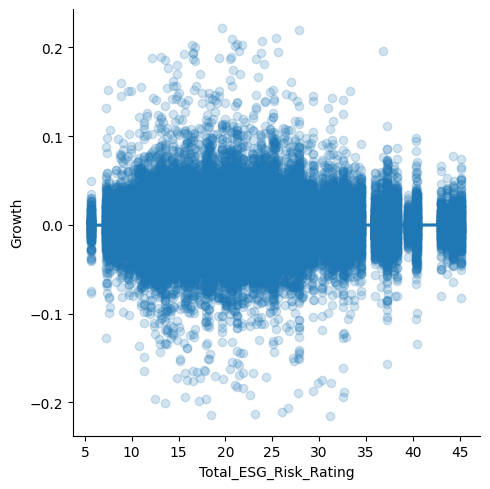

In [ ]:
sns.lmplot(merge_data, x="Total_ESG_Risk_Rating", y="Growth", scatter_kws={'alpha': .2})

### Total ESG Risk Rating v Growth

- Most of our data is centered around the middle, especially for the risk rating around 10-35.

- There does not appear to be a relationshio between total ESG Risk Rating and Growth since there is no obvious upward or downward sloping pattern

- The distribution is roughly symmetrical.

-



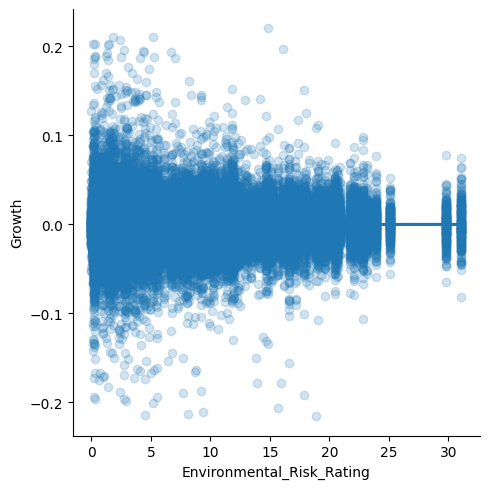

In [ ]:
sns.lmplot(merge_data, x="Environmental_Risk_Rating", y="Growth", scatter_kws={'alpha': .2})

### Environmental Risk Rating v Growth

- Most of the data is centered around a growth rate of 0.

- Our Data does not represent a linear relationship

- High density of data around the low risk rating.

- As the Environmental Risk rating increases the range of Growth risks vary considerably less, this suggests that companies with a higher environmental risk rating are not seeing as much growth as companies with a lower risk rating.

- Our data does suggest a negative assostaiotn, as our the environmental risk rating increases the growth rate appears to decrease.


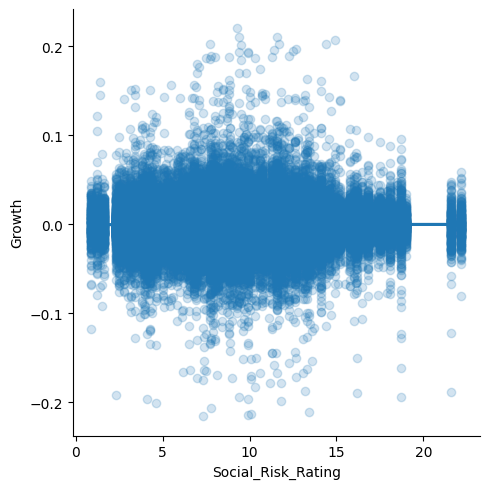

In [ ]:
sns.lmplot(merge_data, x="Social_Risk_Rating", y="Growth", scatter_kws={'alpha': .2})

### Social Risk vs Growth:
- Data is heavily centered around the zero value.

- There seems to be the highest density from the social risk rating of 5-15.

- This regression shows a weak,as is doesn't appear to be any negative or postive sloping trends in the graph.

- Thus this suggests that the social risk rating did not influence companies growth; based on their change in stock value of 2023.


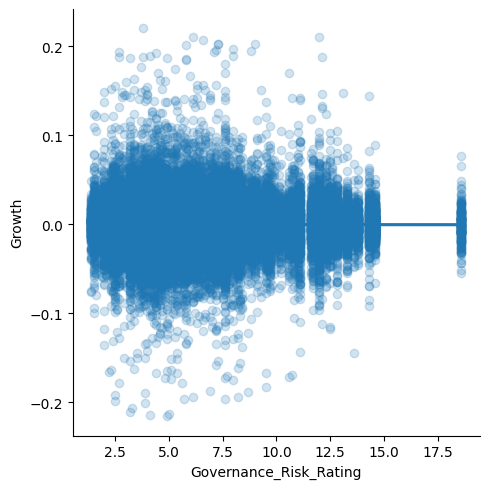

In [ ]:
sns.lmplot(merge_data, x="Governance_Risk_Rating", y="Growth", scatter_kws={'alpha': .2})

Governance Risk Rating vs Growth:

- Again most of data is cented around zero

- Growth rate varies the most when the governance risk rating is low, especially from 2.5-8. Conversely, the growth rates vary the least when the governance risk rating is higher.

- There does appear to be a slight negative association suggesting that as a companies governance risk rating increased their growth rate decreased. However, our data does not necessarily demonstrate a strong assocaition so it would be intersting to see if we ran this again for 2024 stock values and if we obtained a stronger negative assosiation to see if this is a pattern or if it suggests that there is no real association between the two.

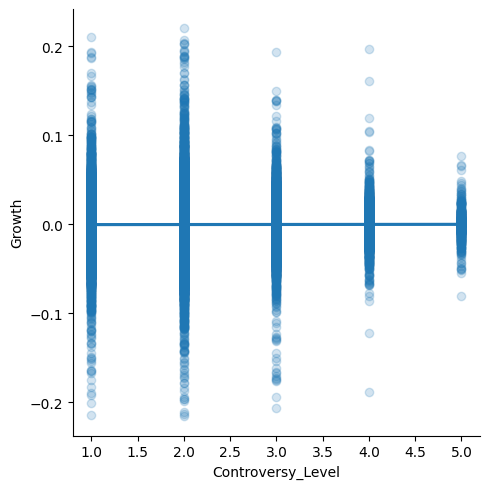

In [ ]:
sns.lmplot(merge_data, x="Controversy_Level", y="Growth", scatter_kws={'alpha': .2})

### Controversy Level Vs Growth:

- The controvery levels that a company could obtain are 1,2,3,4,5.
- From our graph we can see that the lower controversy levels of 1 and 2 have the highest varibility in growth. Where the controvery level of 5 has the lowest variability.
- while there is no linear relationship or trend present in our graph our data does suggest that as the controvery level increases a companies growth decreases, because our data became more centered around lower growth values as our controversy level increased.



<Axes: xlabel='Controversy_Level', ylabel='Count'>

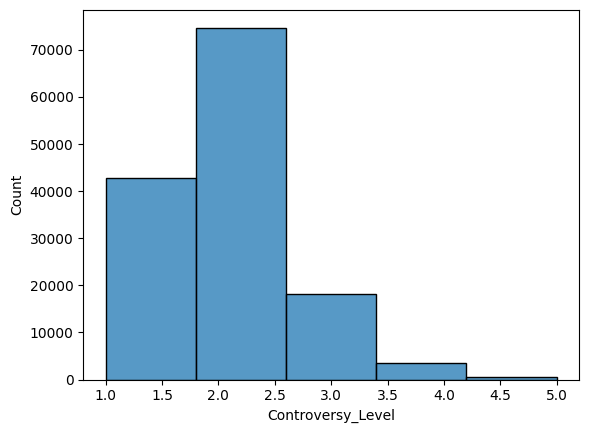

In [ ]:
sns.histplot(merge_data, x="Controversy_Level", bins = 5)

### Descriptive Statistics:

- Controvery level: Measures a companies recent ESG-related controveries which can include actions such as failure to act environmentally responsible, a breach in environmental or ethicial governance, a violation of human rights etc.
-From our histogram we cans see that ESG-related controversies to involving the compaies we examained in our data frame is right skewed. The center of the data has a controversy level around 2.5.
- The spread of this data is between a controvery level of 1 to 5, with 1 being minimal or no controversies invloving the company and a 4 or 5 means there a major controversies.
- With the majority of our data being on the lower controversy level this should be seen as a postive thing for companies.

<Axes: xlabel='Governance_Risk_Rating', ylabel='Count'>

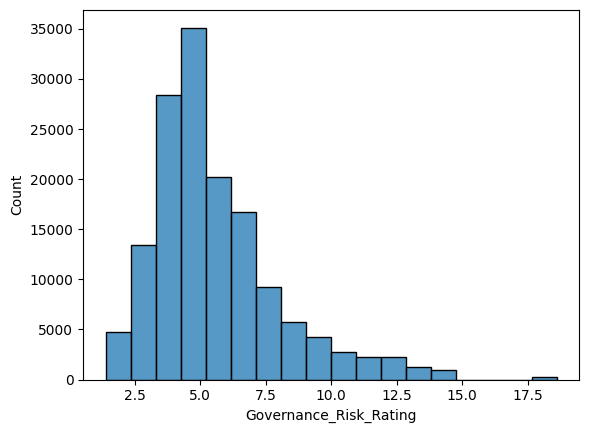

In [ ]:
sns.histplot(merge_data, x="Governance_Risk_Rating", bins = 18)

### Governance Risk rating
- This rating can include expose to government realted risks such as board structure and independence, executvie compensation, shareholder rights, transparency and ethics.

- From our histrogram we can see that our data is right skewed, as the distribution has the majority of companies with a lower governance risk rating

- The distribution has a long right tail an infrequent value with a rating of 17.5
- the mode of this distribution is at a risk rating around 5.

<Axes: xlabel='Social_Risk_Rating', ylabel='Count'>

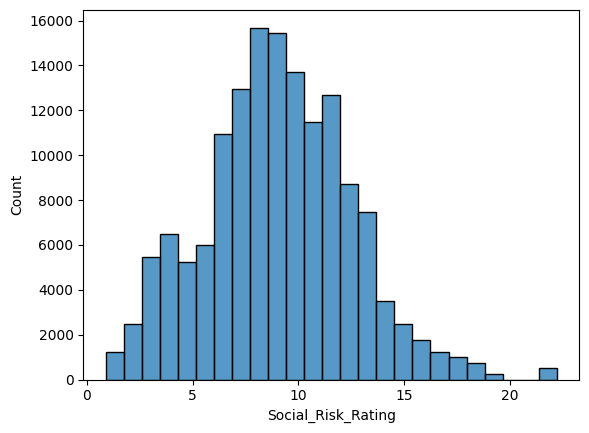

In [ ]:
sns.histplot(merge_data, x="Social_Risk_Rating", bins = 25)

### Social Risk Rating

- Social Risk rating is concerned around issues regarding labor practices, human rights, inclusive culture and representation within the company, customer and community relations and diversity, equity and inclusion (DEI) policies.


- From our histrogram we can see that our data appears to have a normal shape with no heavy skews.
- It appears to have a mode around 9
- with the center of the data around 10.5
-there appears to be an infrequent value with a rating of 22

- This is disappointing to see that so many companies have a medium social risk rating.Especially because so many companies can still be successful but these issues are often times not brought to light due to a companies success. For example with Nike and their Sweatship Labor Allegations in the past, they have heavily relied upon child labor and  still have been known to have bad labor conditions.


<Axes: xlabel='Environmental_Risk_Rating', ylabel='Count'>

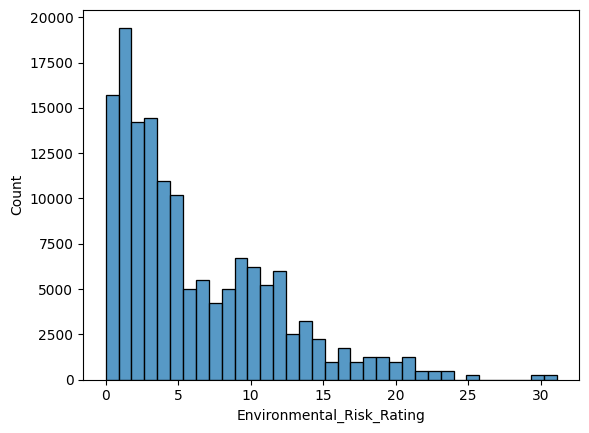

In [ ]:
sns.histplot(merge_data, x="Environmental_Risk_Rating", bins = 35)

### Environmental Risk Rating

- Environmental risk rating measures a compaies risk to issues such as carbon emission, energy efficiency, waste management, climate change strategy.

- With a lower risk score representing that the company practices good environmental behavior
-With a higher risk score representing that a company has poorer sustainability measure or is more liable to the environmental probelms

- From the histogram we can see our data is right skewed, with the majority of data being on the lower risk side. There is a long right tail with some infrequent values around 25 and 30.

- The mode is around a risk rating of 2. And the median is likely around 6
- A large concentration of values appear from 0-5
- There is a large range, from a rating of 0-31.

-This data was suprising to me as I would expect a lot more companies to have a higher environmental risk score since global warming and environmental issues are still such a big concern and aren't necessarily impproving. I think it would be interesting to compare this data in a few years since the new adminstration wants to make changes to how important environmental issues may be to addrressed especially within the corporate world.

<Axes: xlabel='Total_ESG_Risk_Rating', ylabel='Count'>

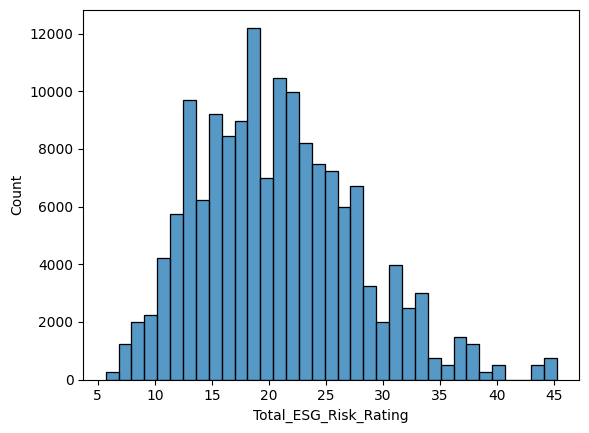

In [ ]:
sns.histplot(merge_data, x="Total_ESG_Risk_Rating", bins = 35)

### Total ESG Risk Rating

- This is a composite score reflecting the company's overall exposure to ESG-related risks.
- A lower score means the company has a better ESG performance
- A Higher Score measn the company is more likely to have some ESG-related issues.

- From the histogrom our data appears to be approximately normal, and not heavily skewed with a mode around 19. There are some infrequent values around 45.

- And the range of this data is from 45-7.


<Axes: xlabel='Growth', ylabel='Count'>

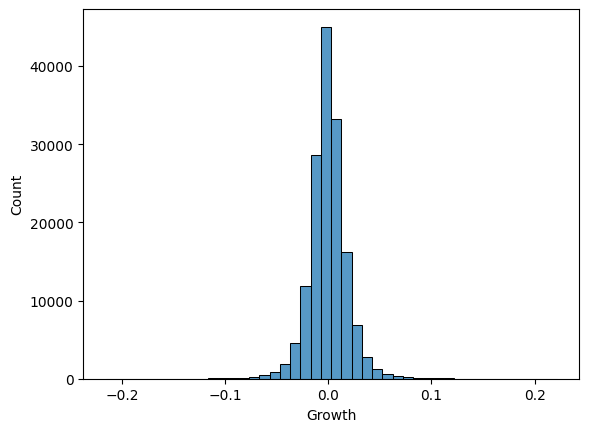

In [ ]:
sns.histplot(merge_data, x="Growth", binwidth = 0.01)

### Growth

- This distribution shows the growth rate of all the companies as a whole.
- Our distribution is centered at 0, and appears to be a normal distribution.

- I think it's interesting to note that a lot of the companies we are examining did not see a significant amount of growth based on their stock market performance in 2023, as the center of our distribution is at 0.

### Conclusion

It appears that ESG and growth do have some negative association mostly in the ESG categories of Environmental, Governance and Controvery Risk. However, I think it would be impotant to look at mulitple different data sets and more stock market data over the years to determine if these trends are accurate or any more pronounced. Additionally, to see the overall affect of ESG on companies we could look at other factors such as certain sectors of each company and their growth, or instead of using stock market data we could compare a company to their S&P 500.

## Significiance of the Project:

Overall this project examines Environmental, Social and Governance Factors and how they affect a company and their business.

- Specifically our porject explored whether the more ESG responsability companies performed well financailly through their 2023 stocks compared to the companies with less ESG responsability.

- This project is significant because these social, evironmental and goverance issues are real problems but many times they are overlooked by companies. Looking at this data can help support build a more sustainable and socially positive portfolio for businesses.

- Additionally this information can help to keep companies accountable for their actions as more people became aware of these ratings.

- As a consumer I think it would be useful to know how companies rate on the different ESG categories as it might defer consumers if their ratings are poor in certain areas. For instance before this project I had never heard of the term ESG so I found this project intersting and am now more curious to see how the companies/corportaion I buy from fall into these ratings becuase I would not want to support companies with very low environmental, social or governance ratings.

## Refrences

- Professor Choe

- ChatGPT: For help in generating graphs of ESG category and Growth and analyzing some of them.